## Imports

In [1]:
import numpy as np
import cv2
import os
from skimage.feature import hog
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.feature import hog

## Load Dataset

In [2]:
car_filenames = []
not_car_filenames = []

dir_name = './vehicles/vehicles/'
for path, dirs, files in os.walk(dir_name):
    for file in files:
        if file == '.DS_Store' : continue
        name = path  +'/' + file
        car_filenames.append(name)
        
dir_name2 = './non-vehicles/non-vehicles/'
for path, dirs, files in os.walk(dir_name2):
    for file in files:
        if file == '.DS_Store' : continue
        name = path  +'/' + file
        not_car_filenames.append(name)

In [3]:
img1=cv2.imread(not_car_filenames[2])
img2=cv2.imread(car_filenames[89])
img3=cv2.imread(car_filenames[53])
cv2.imshow('img1',img1)
cv2.imshow('img2',img2)
cv2.imshow('img3',img2)
cv2.waitKey()
cv2.destroyAllWindows()

In [4]:
car_labels = [1] * len(car_filenames)
not_car_labels = [0] * len(not_car_filenames)

## Basic Summary of Dataset

In [5]:
len(car_filenames),len(not_car_filenames)

(8792, 8968)

In [6]:
len(car_labels), len(not_car_labels)

(8792, 8968)

In [7]:
for i in range(5):
    ldx=np.random.randint(len(car_filenames))
    car_filenames_shape=cv2.imread(car_filenames[ldx]).shape
    print(car_filenames_shape)

(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


In [8]:
for i in range(5):
    ldx=np.random.randint(len(not_car_filenames))
    car_filenames_shape=cv2.imread(not_car_filenames[ldx]).shape
    print(car_filenames_shape)

(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


## Visualize Some of the Data

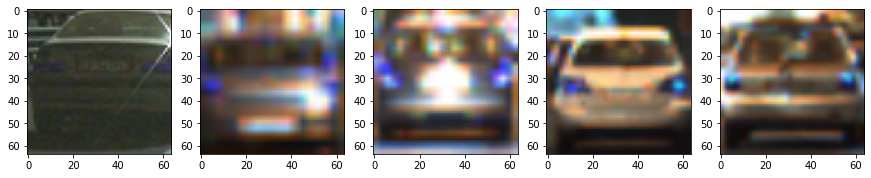

In [9]:
fig = plt.figure(figsize=(15,3))
for i in range(5):
    idx = np.random.randint(len(car_filenames))
    img = cv2.imread(car_filenames[idx])
    plt.subplot(1, 5, i+1)
    plt.imshow(img)

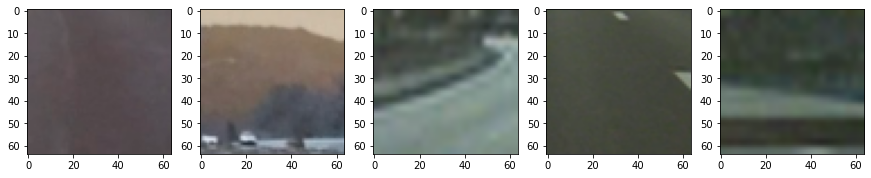

In [10]:
fig = plt.figure(figsize=(15,3))
for i in range(5):
    idx = np.random.randint(len(not_car_filenames))
    img = cv2.imread(not_car_filenames[idx])
    plt.subplot(1, 5, i+1)
    plt.imshow(img)

## Feature Extraction Method

In [11]:
features=[]

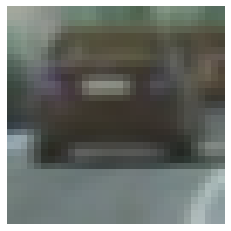

In [12]:
# Raw pixel intensity : (Color and Shape)
image = cv2.imread(car_filenames[1])
image_32x32 = cv2.resize(image, (32, 32))

image_f = image_32x32.flatten()

plt.imshow(image_32x32, cmap="gray"), plt.axis("off") 
plt.show()

In [13]:
image_32x32.shape

(32, 32, 3)

In [14]:
image_f.shape

(3072,)

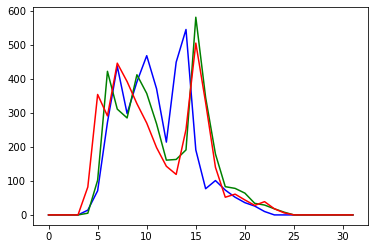

In [15]:
# Histogram of pixel intensity : (Color only)
color_list = ['b', 'g', 'r']

hist_f = np.array([])

for i in range(3):
    hist = cv2.calcHist(images=[image], channels=[i], mask=None, histSize=[32], ranges=[0, 255]).flatten()
    hist_f = np.r_[hist_f, hist]
        
    plt.plot(hist, color=color_list[i])

In [16]:
hist_f.shape

(96,)

In [17]:
type(hist_f)

numpy.ndarray

In [18]:
# Gradients of pixel intensity : (Shape only)

image2 = cv2.imread(car_filenames[1], cv2.IMREAD_GRAYSCALE)

hog_feature, hog_image = hog(image2, orientations=9, pixels_per_cell=(8,8),
                            cells_per_block=(2,2),
                            block_norm='L2-Hys', transform_sqrt=False,
                            visualize=True, feature_vector= True)


In [19]:
hog_feature.shape

(1764,)

In [20]:
np.r_[image_f, hist_f, hog_feature].shape

(4932,)

In [21]:
features.append(np.r_[image_f, hist_f, hog_feature])

In [22]:
len(features)

1

## Feature Extraction

In [71]:
import hog_function

In [72]:
orient=9
pixels_per_cell=8
cells_per_block=2
spatial=32
hist_bins=32

In [73]:
features = []

In [75]:
for i in range(len(car_filenames)):
    
    image = cv2.imread(car_filenames[i])
    image_32x32 = cv2.resize(image, (spatial, spatial))

    image_f = image_32x32.flatten()

    color_list = ['b', 'g', 'r']

    hist_f = np.array([])

    for i in range(3):
        hist = cv2.calcHist(images=[image], channels=[i], mask=None, histSize=[hist_bins], ranges=[0, 255]).flatten()
        hist_f = np.r_[hist_f, hist]

    image2 = cv2.imread(car_filenames[i], cv2.COLOR_BGR2GRAY)
    ch1=image2[:,:,0]
    ch2=image2[:,:,1]
    ch3=image2[:,:,2]

    hog1 = hog_function.hog_f(ch1, orient, pixels_per_cell, cells_per_block)
    hog2 = hog_function.hog_f(ch2, orient, pixels_per_cell, cells_per_block)
    hog3 = hog_function.hog_f(ch3, orient, pixels_per_cell, cells_per_block)

    features.append(np.r_[image_f, hist_f, hog1,hog2,hog3])


KeyboardInterrupt: 

In [53]:
len(features)

8792

In [54]:
features[0].shape

(8460,)

In [55]:
for i in range(len(not_car_filenames)):
    
    image = cv2.imread(not_car_filenames[i])
    image_32x32 = cv2.resize(image, (spatial, spatial))

    image_f = image_32x32.flatten()


    color_list = ['b', 'g', 'r']

    hist_f = np.array([])

    for i in range(3):
        hist = cv2.calcHist(images=[image], channels=[i], mask=None, histSize=[hist_bins], ranges=[0, 255]).flatten()
        hist_f = np.r_[hist_f, hist]

    #image2 = cv2.imread(not_car_filenames[i], cv2.IMREAD_GRAYSCALE)
    
    ch1=image[:,:,0]
    ch2=image[:,:,1]
    ch3=image[:,:,2]

    hog1 = hog_function.hog_f(ch1, orient, pixels_per_cell, cells_per_block)
    hog2 = hog_function.hog_f(ch2, orient, pixels_per_cell, cells_per_block)
    hog3 = hog_function.hog_f(ch3, orient, pixels_per_cell, cells_per_block)

    features.append(np.r_[image_f, hist_f, hog1,hog2,hog3])

In [30]:
len(features)

17760

In [31]:
features[10].shape

(4932,)

## Data Preparation

In [56]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

In [57]:
labels=car_labels+not_car_labels

In [58]:
len(labels)

17760

In [59]:
X_train,X_test,y_train,y_test=train_test_split(features,labels,test_size=0.2,
                                               stratify=labels,random_state=42)

In [60]:
scaler=StandardScaler()
scaled_train=scaler.fit_transform(X_train)
scaled_test=scaler.transform(X_test)

## Classifier

In [61]:
svm_c=LinearSVC()

In [62]:
svm_c.fit(X_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [63]:
svm_c.score(X_train, y_train)

0.9726914414414415

In [64]:
pred=svm_c.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
accuracy_score(y_test,pred)

0.9487612612612613

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid=[{'C':[0.1]}]

grid_search = GridSearchCV(svm_c,param_grid=param_grid,scoring="accuracy",cv=5,n_jobs=-1)

grid_search.fit(X_train,y_train)

In [ ]:
grid_search.best_params_

## Data Saving to Pickle

In [67]:
import pickle

In [68]:
dist_pickle={}
dist_pickle["svc"]=svm_c
dist_pickle["scaler"]=scaler
dist_pickle["hog_f"]=hog_function.hog_f
dist_pickle["orient"]=orient
dist_pickle["pix_per_cell"]=pixels_per_cell
dist_pickle["cell_per_block"]=cells_per_block
dist_pickle["spatial"]=spatial
dist_pickle["hist_bins"]=hist_bins
pickle.dump(dist_pickle, open("car_classifier_pickle.p",'wb'))


print('Classifier parameters saved to file')

Classifier parameters saved to file
